# Projeto Machine Learning Não-supervisionado:

Neste projeto vamos fazer recomendações baseadas no gênero de filmes.

In [1]:
import pandas as pd

url_dados = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"

dados = pd.read_csv(url_dados)

dados.columns = ['filme_id','titulo','generos']

dados.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Para analisar estes dados de forma categórica em relação ao gênero, vamos extrair os *dummies* da coluna de gêneros.

Para isso, usamos a função ```get_dummies()``` para as strings da coluna gêneros. Uma vez extraidas as categorias, salvamos o resultado em um novo DataFrame(```generos_classificados```). Concatenamos (```pd.concat()```) esse novo DataFrame no de dados principal para poder manter as inforamações agrupadas.

Depois de obter as colunas categóricas dos gêneros, podemos excluir a coluna gêneros do DataFrame usando o comando ```drop()```

In [2]:
generos_classificados = dados.generos.str.get_dummies()
dados = pd.concat([dados,generos_classificados], axis=1)

dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparação de dados para o aplicar o *K-Modes*

In [3]:
dados_copia = dados.copy()

In [4]:
#instalando a KModes

!pip install kmodes

In [5]:
# Importando a KModes

from kmodes.kmodes import KModes

### Utilizando o inicializador de Huang e 4 clusters


In [6]:
km = KModes(n_clusters=4, init = "Huang", n_init = 1, verbose=1)
clusters = km.fit_predict(generos_classificados)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1750, cost: 14729.0
Run 1, iteration: 2/100, moves: 305, cost: 14729.0


array([0, 0, 0, ..., 1, 2, 0], dtype=uint16)

In [7]:
#convertendo o array de clustes em DataFrame
clusters_DF = pd.DataFrame(clusters)
clusters_DF.columns = ['cluster']
clusters_DF

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
9737,0
9738,0
9739,1
9740,2


In [8]:
dados = pd.concat([dados_copia, clusters_DF],axis=1,).reset_index()
dados = dados.drop('index',axis=1)
dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Visualizando os centróides gerados:

In [9]:
km.cluster_centroids_

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [10]:
#Criando um DataFrame para fazer plotagens
centroides_DF = pd.DataFrame(km.cluster_centroids_, columns= generos_classificados.columns)
centroides_DF

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


Uma técnica comum para redução do espaço das variáveis é utilizar as variedades matemáticas (*manifolds*). Para isso, o *SKLearn* já conta com um algoritmo comumente utilizado para isso implementado, o ```TSNE()```.

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao_TSNE = tsne.fit_transform(generos_classificados)
visualizacao_TSNE

array([[  0.6675362 ,  36.661636  ],
       [ -4.515707  ,  27.536951  ],
       [ 56.539764  ,  17.050558  ],
       ...,
       [ -4.6341476 , -25.083563  ],
       [-30.676092  ,  34.48836   ],
       [ 29.208826  ,  -0.15584745]], dtype=float32)

O resultado é um array. Podemos, então, utilizar o Seaborn para visualizar essas informações em um gráfico.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


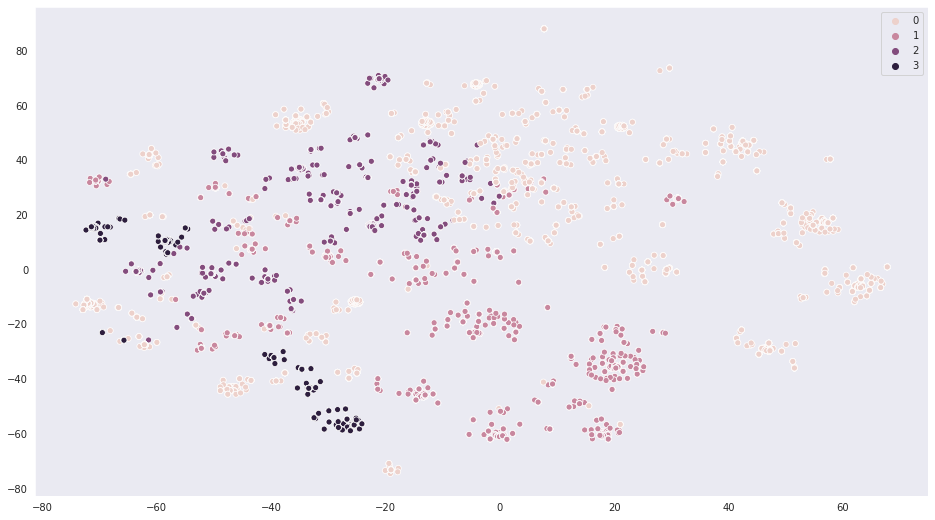

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
sns.set_style("dark")
sns.scatterplot(x=visualizacao_TSNE[:,0],
                y= visualizacao_TSNE[:,1],
                hue=km.labels_)
plt.show()

## Avaliando o número de clusters



Vamos pegar uma amostra para ver se os filmes que estão sendo agrupados nos clusters estão realmente coerentes.

In [13]:
grupo = 1
selecao = km.labels_ == grupo

dados[selecao].sample(10)[['titulo','generos']]

,titulo,generos
3681,Maelström (2000),Drama|Romance
8500,If I Stay (2014),Drama
3451,Marat/Sade (1966),Drama|Musical
3549,Fiddler on the Roof (1971),Drama|Musical
1764,Glen or Glenda (1953),Drama
9257,Sing Street (2016),Drama
2567,Death Wish 5: The Face of Death (1994),Action|Drama
2364,Grand Illusion (La grande illusion) (1937),Drama|War
5984,Proof (2005),Drama
799,Beautiful Thing (1996),Drama|Romance


Os clusters não parecem muito concisos. Rodando algumas vezes o código acima, é possível ver filmes infantis associados com filmes de terror. Não é um bom sinal. 

Vamos ver se aumentando o número de clusters, teremos resultados melhores. Para isso, vamos utilizar o parâmetro ```cost_``` do KModes como referência.

In [14]:
#Criando uma função para avaliar o número de clusters
custo = []
for num_clusters in list(range(1,41)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(generos_classificados)
    custo.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22084.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2287, cost: 17618.0
Run 1, iteration: 2/100, moves: 240, cost: 17618.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17520.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2042, cost: 14968.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1233, cost: 13891.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 852, cost: 13318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2608, cost: 13253.0
Run 1, iteration: 2/100, moves: 

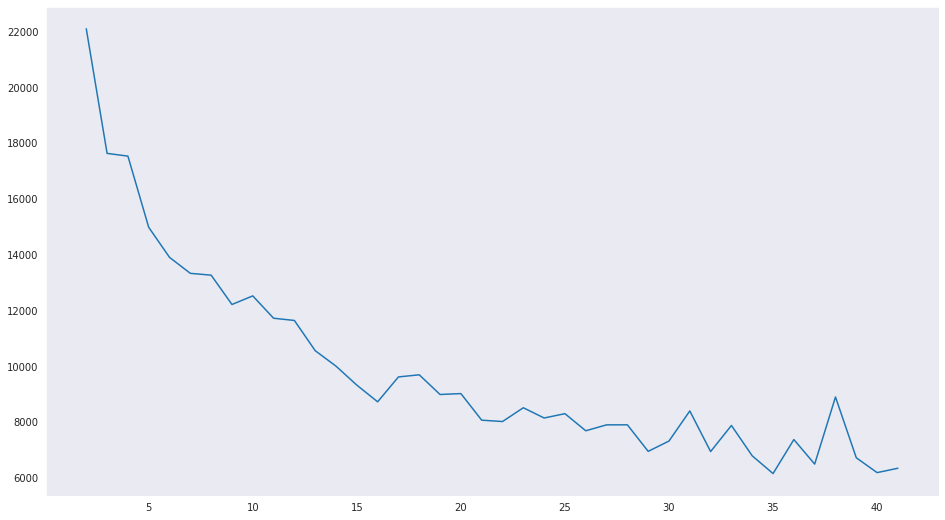

In [15]:
import numpy as np
y = np.array([i for i in range(2,42,1)])

plt.figure(figsize=(16,9))

plt.plot(y,custo)
plt.show()

Pela regra do cotovelo, podemos perceber que o erro parece decair com uma taxa menor a partir de 12 clusters. Vamos tentar utilizar esse número para o nosso problema.

In [16]:
km = KModes(n_clusters=12, init = "Huang", n_init = 1, verbose=1)
clusters = km.fit_predict(generos_classificados)
clusters

#convertendo o array de clustes em DataFrame
clusters_DF = pd.DataFrame(clusters)
clusters_DF.columns = ['cluster']
clusters_DF

dados = pd.concat([dados_copia, clusters_DF],axis=1,).reset_index()
dados = dados.drop('index',axis=1)
dados.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2234, cost: 11631.0


,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#Visualizando os clusters
centroides_DF = pd.DataFrame(km.cluster_centroids_, columns= generos_classificados.columns)
centroides_DF

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Vamos repetir o teste com amostras para ver se conseguimos um resultado mais conciso. Por exemplo, usando o grupo 10, espera-se obter títulos voltados ao público infantil.

In [18]:
#testando os grupos
grupo = 10
selecao = km.labels_ == grupo

dados[selecao].sample(10)[['titulo','generos']]

,titulo,generos
5496,Futureworld (1976),Sci-Fi|Thriller
5398,"Invisible Man Returns, The (1940)",Horror|Sci-Fi
370,Body Snatchers (1993),Horror|Sci-Fi|Thriller
4559,Videodrome (1983),Fantasy|Horror|Sci-Fi|Thriller
9190,Garm Wars: The Last Druid (2014),Action|Sci-Fi|Thriller
9668,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller
5763,Wizards (1977),Animation|Fantasy|Sci-Fi|War
4487,Man's Best Friend (1993),Horror|Sci-Fi|Thriller
1676,Parasite (1982),Horror|Sci-Fi
1405,Plan 9 from Outer Space (1959),Horror|Sci-Fi


O resultado parece estar mais coerente. Vamos ver o que isso influencia no gráfico TSNE

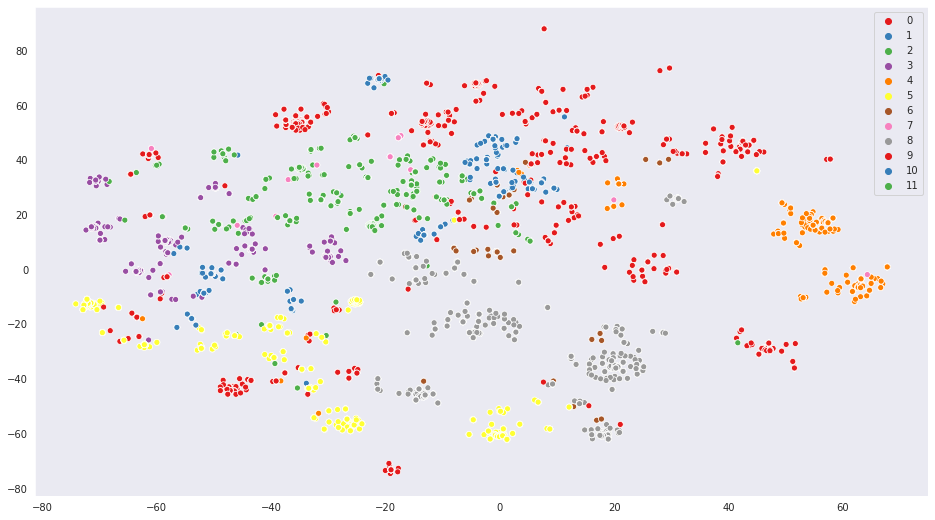

In [19]:
plt.figure(figsize=(16,9))
sns.set_style("dark")
sns.scatterplot(x=visualizacao_TSNE[:,0],
                y= visualizacao_TSNE[:,1],
                hue=km.labels_,
                palette=sns.color_palette('Set1',12))
plt.show()

## Agrupamento de gêneros

Vamos tentar agora juntar os gêneros que são semelhantes para tentar obter uma classificação hierárquica. Vamos usar o ```AgglomerativeCluestering()```.

In [20]:
from sklearn.cluster import AgglomerativeClustering

modelo_aglomerados = AgglomerativeClustering(n_clusters=12)
clusters_aglomerados = modelo_aglomerados.fit_predict(generos_classificados)
clusters_aglomerados


array([ 8,  5,  1, ..., 11,  5,  9])